###Exercise 1

In [24]:
import numpy as np
import matplotlib.pyplot as plt

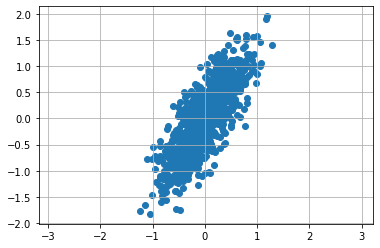

In [25]:
#Step-1 Create data
rng = np.random.RandomState(0)
A = rng.randn(1000, 2)
B = rng.rand(2,2)
X = np.dot(A,B)
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.grid('on')


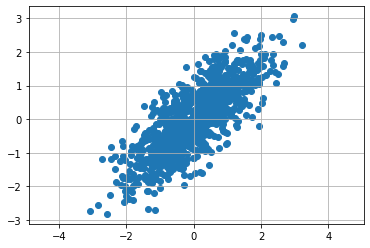

In [26]:
X_std = (X - np.mean(X , axis = 0))/X.std(axis=0)
plt.scatter(X_std[:, 0], X_std[:, 1])
plt.axis('equal')
plt.grid('on')
plt.show()

In [27]:
#Step-2: Calculate the covariance matrix
cov_mat = np.cov(X_std.T)
cov_mat

array([[1.001001 , 0.7917115],
       [0.7917115, 1.001001 ]])

In [28]:
#Step-3: Compute Eigen Values and Eigen Vectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues 
[0.2092895 1.7927125]


In [29]:
# Step 4: Sort the eigenvectors by decreasing eigenvalues and choose the eigenvector with the largest eigenvalues to form a dimensional matrix W
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov [:,i]) for i in range(len(eig_val_cov))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
for i in eig_pairs:
    print(i[0])

1.7927124992349557
0.20928950276704628


In [30]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1),
                      eig_pairs[1][1].reshape(2,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [31]:
# Step 5 Transforming the samples onto the new subspace
Y = X_std.dot(matrix_w)

###Exercise 2

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','kind'])
x = iris_data.drop(['kind'],axis=1)
y = iris_data.kind


In [34]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   kind          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
iris_data.shape

(150, 5)

###Implement PCA algorithm to reduce dimension (2D) of iris dataset, then visualize  the result.

In [36]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
#Calculate the covariance matrix:
iris_data_cov_matrix = np.cov(x.T)
iris_data_cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [37]:
#Calculating the eigenvalues and eigenvectors of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(iris_data_cov_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [38]:
#Sorting the list of eigenvalues in descending order
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


In [39]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


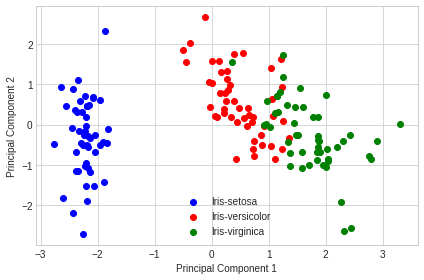

In [40]:
# Transforming the samples onto the new subspace
Y = x.dot(matrix_w)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

###Exercise 3

###Use PCA in sklearn to iris dataset and compare the result with the question 2.

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [42]:
final_data = pd.concat([principalDf, iris_data[['kind']]], axis = 1)

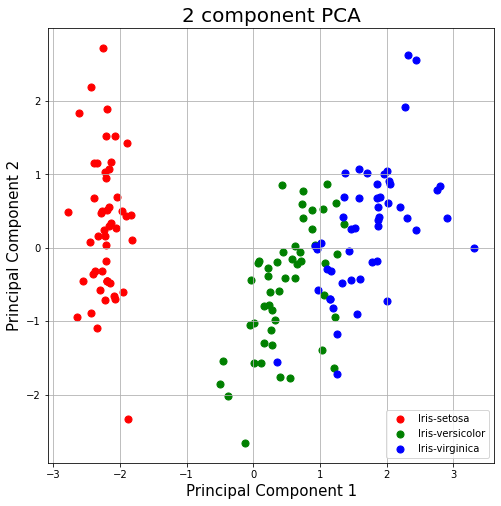

In [43]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
kinds = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for kind, color in zip(kinds,colors):
    indicesToKeep = final_data['kind'] == kind
    ax.scatter(final_data.loc[indicesToKeep, 'principal component 1']
               , final_data.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(kinds)
ax.grid()